<a href="https://colab.research.google.com/github/rakeshreddyd56/OPencvcartoon/blob/master/OPencvmb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np


In [ ]:
num_down=2
num_bilateral=7

In [ ]:
img_rgb=cv2.imread("sample_data/Mahesh_Babu_in_Spyder_(cropped).jpg")
print(img_rgb.shape)

(1034, 775, 3)


In [ ]:
img_rgb = cv2.resize(img_rgb,(800,800))
print(img_rgb.shape)

(800, 800, 3)


In [ ]:
img_color=img_rgb
for _ in range(num_down) :
  img_color=cv2.pyrDown(img_color)

In [ ]:
for _ in range(num_bilateral) :
  img_color=cv2.bilateralFilter(img_color,d=9,sigmaColor=9,sigmaSpace=7)

In [ ]:
for _ in range(num_down) :
  img_color=cv2.pyrUp(img_color)

In [ ]:
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray,7)


In [ ]:
  img_edge=cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,blockSize=9,C=2)

In [ ]:
img_edge = cv2.cvtColor(img_edge,cv2.COLOR_GRAY2RGB)
img_cartoon = cv2.bitwise_and(img_color,img_edge)

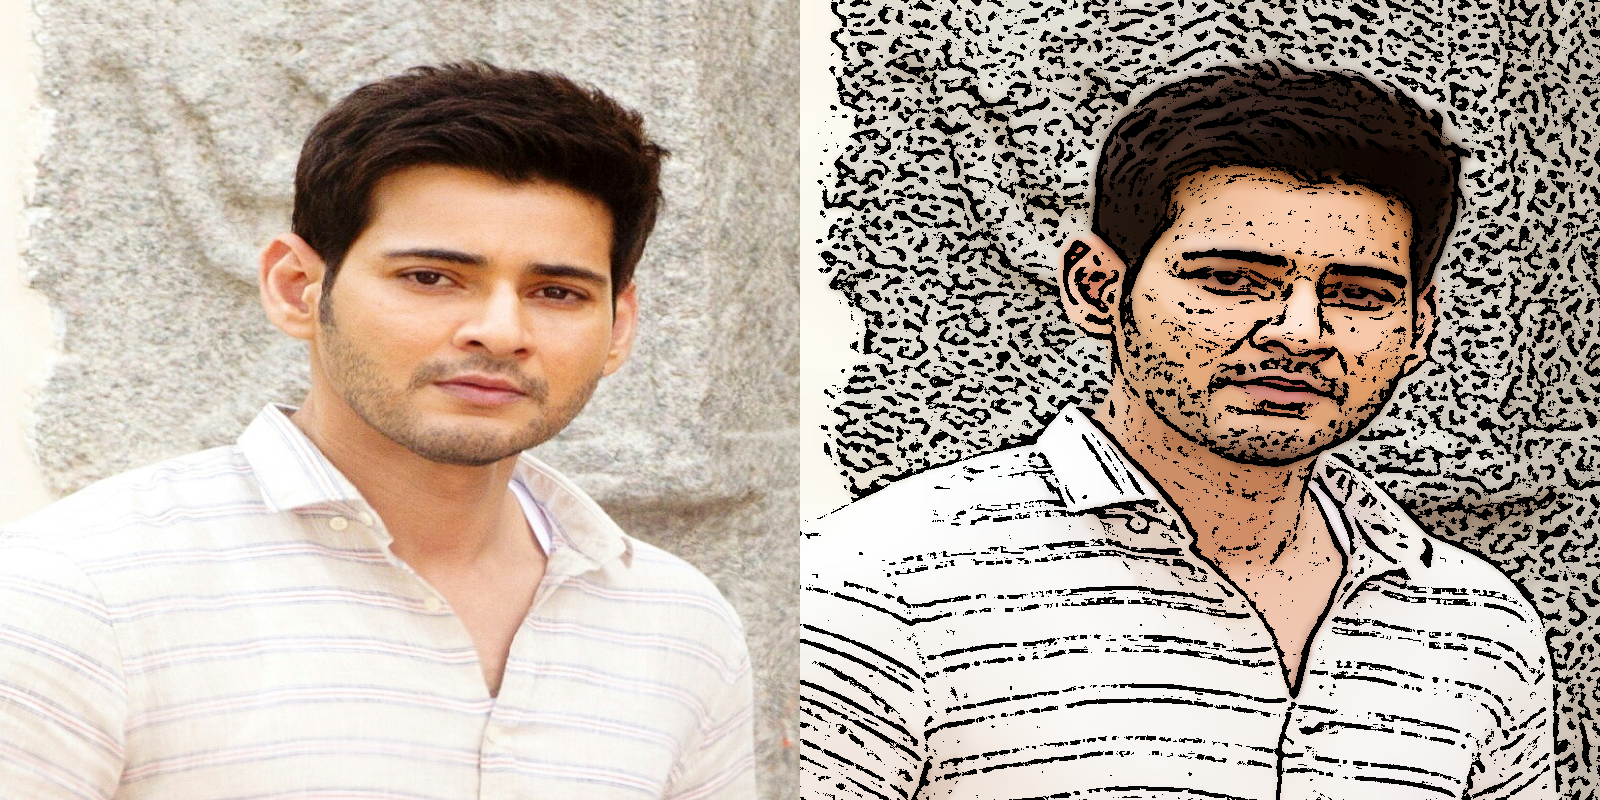

In [ ]:
from google.colab.patches import cv2_imshow
#cv2_imshow(img_cartoon)
stack=np.hstack([img_rgb,img_cartoon])
cv2_imshow(stack)
